# Pymaceuticals Inc.
---

### Analysis

- According to the linear regression model, there is a high positive correlation between the weight and the average tumor volume.
- Among the four promising regimens, Capomulin and Ramicane have similar distributions, where Capomulin has a slightly higher median value than Ramicane. Infubinol and Ceftamin have similar median value and third quartile, but Ceftamin has a much lower first quartile.
- Infutibul has an outlier that needs to be addressed in case it is affecting results

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on = "Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
len(combined_data["Mouse ID"].unique())

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_data = combined_data[combined_data.duplicated(subset = ["Mouse ID", "Timepoint"])]
duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_data[combined_data["Mouse ID"] == "g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data.loc[combined_data["Mouse ID"] != "g989"]
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_data["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].describe()
summary = summary[["mean", "std"]]
summary["var"] =  clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
summary["median"] =  clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
summary["sem"] =  clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
summary = summary[["mean", "median","var", "std","sem"]]
summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary2 = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
summary2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

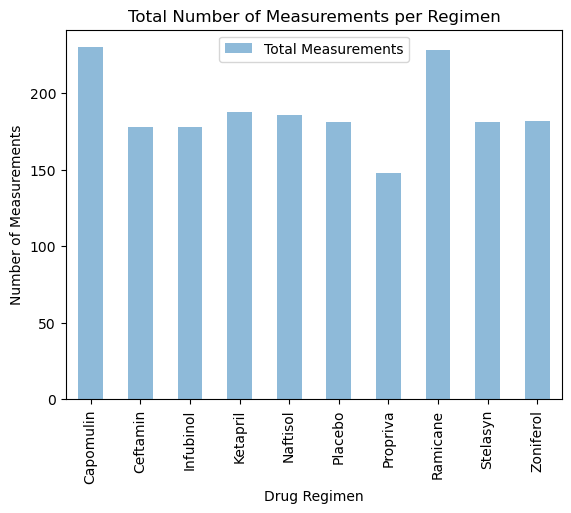

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_group = clean_data.groupby("Drug Regimen").count()
pandas_bar = regimen_group[["Mouse ID"]].rename(columns = {"Mouse ID":"Total Measurements"})
pandas_bar.plot(kind = "bar", alpha = .50)
plt.ylabel("Number of Measurements")
plt.title("Total Number of Measurements per Regimen")
plt.show()

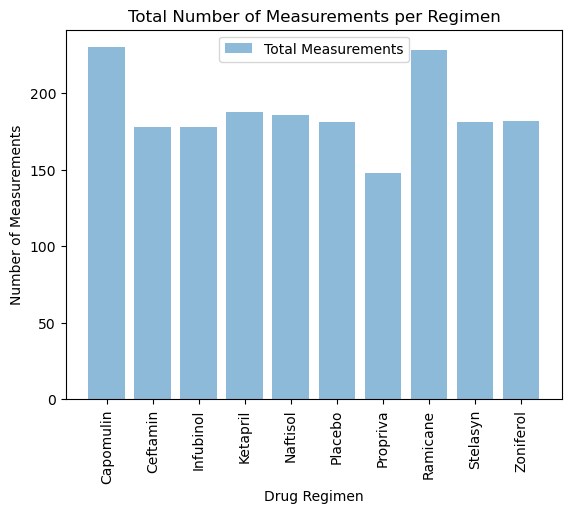

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = np.arange(len(regimen_group))
tick_locations = [x for x in x_axis]
plt.bar(tick_locations, pandas_bar["Total Measurements"], alpha = .5, align = "center", label = "Total Measurements")
plt.xticks(tick_locations, regimen_group.index, rotation = "vertical")
plt.title("Total Number of Measurements per Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")
plt.legend(loc = "best")
plt.show()

<bound method YAxis.set of <matplotlib.axis.YAxis object at 0x000001AA65B5DB80>>

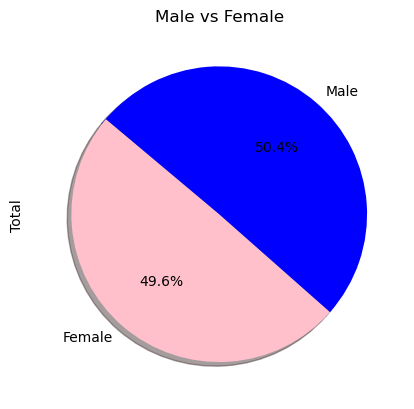

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_data = clean_data.drop_duplicates(subset = "Mouse ID").groupby("Sex").count()
sex_data = sex_data["Mouse ID"].to_frame().rename(columns ={ "Mouse ID" : "Total"})

colors = ["pink", "blue"]
sex_data.plot(kind = "pie", y = "Total", title = "Male vs Female",autopct="%1.1f%%", shadow=True, startangle=140, colors = colors, legend = False).yaxis.set

Text(0.5, 1.0, 'Male vs Female')

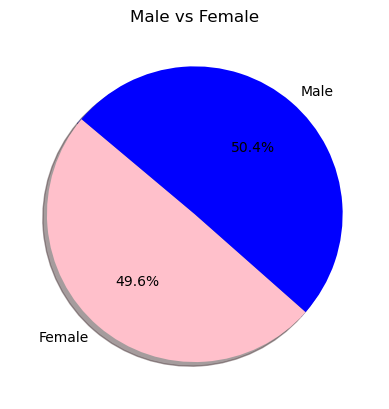

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
male = sex_data.loc["Male", "Total"]
female = sex_data.loc["Female", "Total"]

labels = sex_data.index
colors = ["pink", "blue"]
sizes = [female, male]
plt.pie(sizes,labels=labels, colors = colors,
      autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Male vs Female")

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
clean2 = pd.DataFrame.copy(clean_data)
treatments = clean_data.set_index("Drug Regimen").loc[["Capomulin","Ramicane", "Infubinol","Ceftamin"]].reset_index()
# Start by getting the last (greatest) timepoint for each mouse
treatments = treatments.groupby("Mouse ID")["Timepoint"].max()
treatments = pd.DataFrame(treatments).reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
combined = pd.merge(clean2, treatments, on = ["Timepoint", "Mouse ID"])
combined

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
95,x822,Ceftamin,Male,3,29,45,61.386660,3
96,y163,Infubinol,Female,17,27,45,67.685569,3
97,y769,Ceftamin,Female,6,27,45,68.594745,4
98,y865,Ceftamin,Male,23,26,45,64.729837,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Ramicane", "Capomulin", "Ceftamin", "Infubinol"]

# Create empty list to fill with tumor vol data (for plotting)
lists = {}

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = combined["Tumor Volume (mm3)"].quantile([.25,.50,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
IQR = upperq - lowerq

print(f"Lower quartile of Tumor Volume is: {lowerq} mm3.")
print(f"Upper quartile of Tumor Volume is: {upperq} mm3.")
print(f"Interquartile range of Tumor Volume is: {IQR} mm3.")
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    for index, row in combined.iterrows():
        if row["Drug Regimen"] == treatment:
            lists.setdefault(treatment, []).append(row["Tumor Volume (mm3)"])
frame= pd.DataFrame(lists)
    
    # add subset 

    
    # Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*IQR)
upper_bound = upperq + (1.5*IQR)

print(f"Values below {lower_bound} may be outliers")
print(f"Values above {upper_bound} may be outliers")

Lower quartile of Tumor Volume is: 37.1877438025 mm3.
Upper quartile of Tumor Volume is: 59.930261755 mm3.
Interquartile range of Tumor Volume is: 22.742517952499995 mm3.
Values below 3.0739668737500097 may be outliers
Values above 94.04403868374999 may be outliers


Text(0.5, 1.0, 'Distribution of final tumor volume')

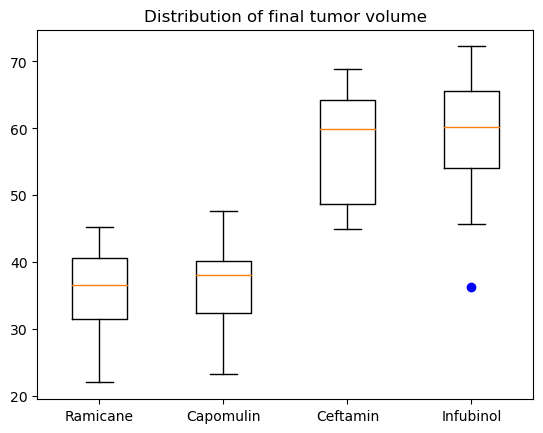

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot([frame["Ramicane"], frame["Capomulin"], frame["Ceftamin"], frame["Infubinol"]], labels = treatments, sym = "b")
plt.title("Distribution of final tumor volume")

## Line and Scatter Plots

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45]

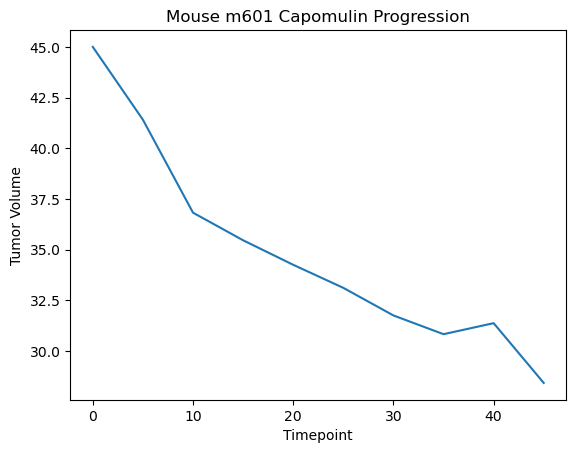

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
m601 = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin"].loc[clean_data["Mouse ID"] == "m601"]

lx_axis = m601["Timepoint"].tolist()
ly_axis = m601["Tumor Volume (mm3)"].tolist()
plt.plot(lx_axis, ly_axis)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
plt.title("Mouse m601 Capomulin Progression")
lx_axis


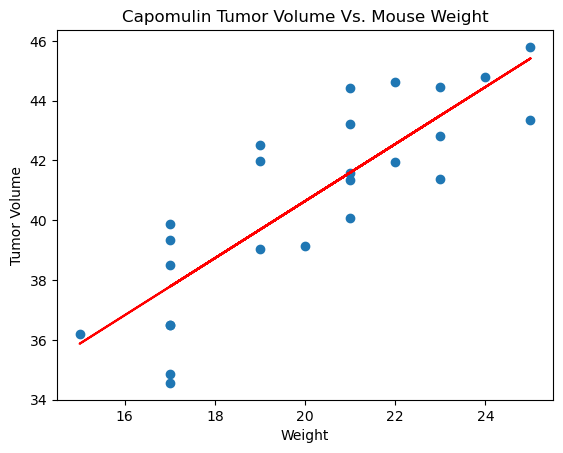

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Capomulin_weight = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin"].groupby("Mouse ID").mean()
sx_axis = Capomulin_weight["Weight (g)"]
sy_axis = Capomulin_weight["Tumor Volume (mm3)"]

#Regression line
correlation = st.pearsonr(sx_axis,sy_axis)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(sx_axis, sy_axis)
regress_values = sx_axis * slope + intercept
plt.scatter(sx_axis,sy_axis)

plt.title("Capomulin Tumor Volume Vs. Mouse Weight")
plt.xlabel("Weight")
plt.ylabel("Tumor Volume")
plt.plot(sx_axis,regress_values, "r-")

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation = st.pearsonr(sx_axis,sy_axis)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(sx_axis, sy_axis)
regress_values = sx_axis * slope + intercept

print(f"The correlation is: {round(correlation[0],2)}")
print(f"Linear Regressions Model: y = {round(slope, 2)}x + {round(intercept, 2)}")

The correlation is: 0.84
Linear Regressions Model: y = 0.95x + 21.55
